<a href="https://colab.research.google.com/github/lwy2107/GK_co_work/blob/master/%EC%8B%A0%EA%B2%BD%EB%A7%9D_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

이미지 처리를 하기위해서는 특징을 잘 추출 해내야한다. 그러므로 특징을 추출하기 위한 합성곱 작업을 해주어야하므로 우선 합성곱에 대해서 알아보자.
8장의 1절은 합성곱과 신경망의 이론을 이야기하니 한번더 읽어봐야함

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data() #케라스의 데이터를 훈련세트, 테스트세트를 구분하여 저장함
train_scaled = train_input.reshape(-1,28,28,1)/ 255.0 #경사측정법을 위해서 1차원배열로 변환시킨후 scaled에 넣어줌
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
model = keras.Sequential() #순차적 모델을 사용 각층을 순차적으로 진행하게 된다.
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1))) #첫번째층 선언. 2D컨버터를 통해 진행 32개의 필터를 사용하며 3,3짜리 커널(도장)을 사용, 패딩은 같은크기로 되게설정하고 활성화는 렐루를 썼다.
#28,28,1은 28x28픽셀에 1(흑백)을 사용중이며 컬러이미지의경우 RGB인 '3'이 들어간다.

In [ ]:
model.add(keras.layers.MaxPooling2D(2)) #28,28 픽셀의 이미지를 사용했으며 32개의 필터를 사용했기에 32개의 특성이 지정되었다. 함수에서는 2풀링을 설정하도록한다. 이렇게 하면 픽셀의 크기는 반으로 줄어든14,14,32가 될것이다.

In [ ]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))#64개의 필터, 커널3,3 ,렐루, 세임패딩
model.add(keras.layers.MaxPooling2D(2))#64개의 특성, 풀링을통해 반으로 줄어든다. 결과적으로는 7,7,64가 된다.

In [ ]:
model.add(keras.layers.Flatten())#평탄화 함수로 1차원배열로 변형을 해준다.경사하강법을 위해서 즉 소프트맥스같은 활성화 함수를 사용하게된다는것.
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))#드랍아웃을 40%로 하여 과대적합을 막았다.
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()#모델의 형식을 보여준다.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

현재 최종 특성맵의 크기는 7,7,64로 되어있다.
그럼 모델 파라미터를 계산해보자.
첫번째 합성곱32개 필터 3,3의 커널사용->3*3*1(깊이 첫번째층 이므로 1)*32+32(절편)=320이 나옴
두번째 합성곱 64개의 필터 3,3의 커널->3*3*32(첫번째 합성곱의 결과로 나온 32개의 필터값)*64(새로 지정한 필터값)+64(필터값에 맞는 절편)
필터는 출력층이다.

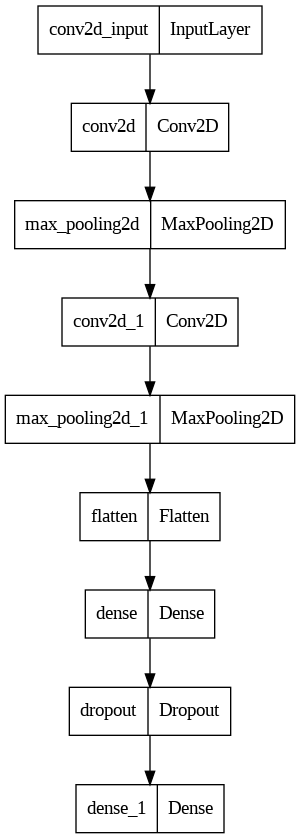

In [ ]:
keras.utils.plot_model(model)

순차적 모델을 사용했기에 진행도 순차적으로 진행된것을 볼수 있다.
더욱 정확하게 보는 방법도 있다.


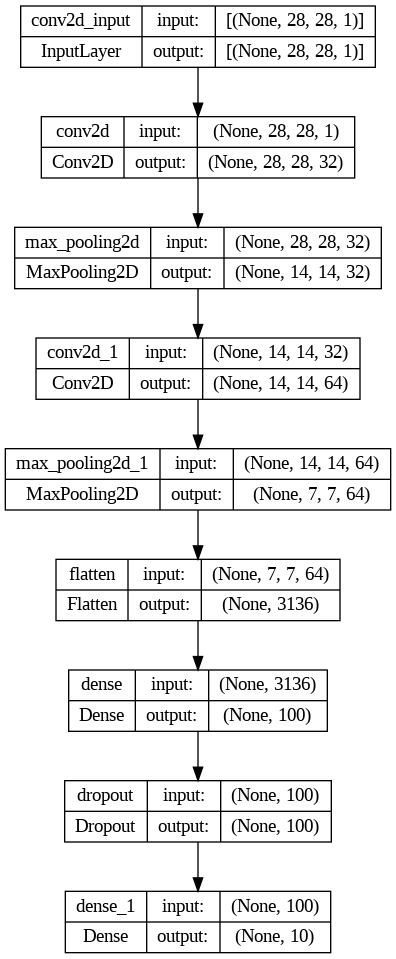

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

이렇게 형태도 같이 볼수 있다.

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics='accuracy')
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
early_stoppin_cb=keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history=model.fit(train_scaled,train_target,epochs=20,validation_data=(val_scaled, val_target),callbacks=[checkpoint_cb, early_stoppin_cb])

Epoch 1/20
1500/1500 [==============================] - 71s 46ms/step - loss: 0.5282 - accuracy: 0.8111 - val_loss: 0.3355 - val_accuracy: 0.8755
Epoch 2/20
   3/1500 [..............................] - ETA: 1:00 - loss: 0.3952 - accuracy: 0.8854

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 59s 39ms/step - loss: 0.3497 - accuracy: 0.8743 - val_loss: 0.2682 - val_accuracy: 0.8978
Epoch 3/20
1500/1500 [==============================] - 56s 37ms/step - loss: 0.2977 - accuracy: 0.8925 - val_loss: 0.2603 - val_accuracy: 0.9031
Epoch 4/20
1500/1500 [==============================] - 59s 39ms/step - loss: 0.2656 - accuracy: 0.9033 - val_loss: 0.2378 - val_accuracy: 0.9092
Epoch 5/20
1500/1500 [==============================] - 73s 49ms/step - loss: 0.2414 - accuracy: 0.9118 - val_loss: 0.2323 - val_accuracy: 0.9129
Epoch 6/20
1500/1500 [==============================] - 62s 41ms/step - loss: 0.2188 - accuracy: 0.9198 - val_loss: 0.2259 - val_accuracy: 0.9189
Epoch 7/20
1500/1500 [==============================] - 61s 41ms/step - loss: 0.2011 - accuracy: 0.9244 - val_loss: 0.2124 - val_accuracy: 0.9237
Epoch 8/20
1500/1500 [==============================] - 57s 38ms/step - loss: 0.1871 - accuracy: 0.9313 - val_loss: 0.2178 - val_accura

합성곱을 훈련한 모델을 사용해서 다시 훈련했다 adam 옵티마이저를 사용했고 콜백을 사용해서 최적화된 모델의 파라미터를 저장해두었다. 에포크가 20회이긴하지만 조기종료를 사용해서 최적이 될때 멈추었다.
합성곱을 하니 전보다 훨씬 빠르고 높은 예측을 보여준다.

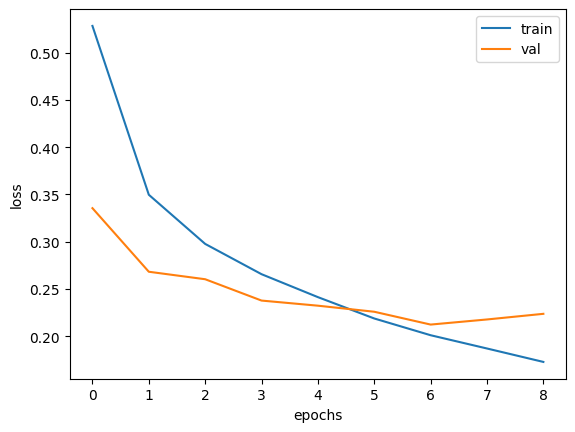

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 5s 13ms/step - loss: 0.2124 - accuracy: 0.9237


[0.21236002445220947, 0.9236666560173035]

모델세트를 평가해보았는데 이전의 모델을 잘복원했기에 높은 예측을 보여준다.

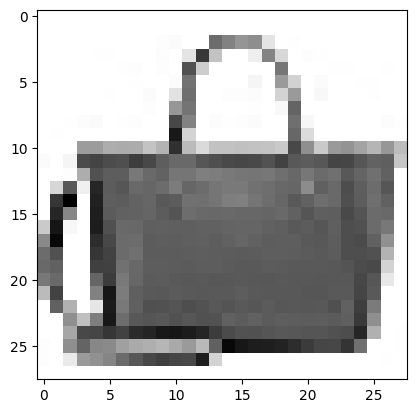

In [ ]:
plt.imshow(val_scaled[0].reshape(28,28),cmap='gray_r')
plt.show()

검증세트의 첫번째이미지를 플릿플롭으로 불러와보았다 이미지 크기는 28*28로 했다. 이미지가 흑백이므로 28*28,1로 지정된것이다.

In [ ]:
pred=model.predict(val_scaled[0:1])
print(pred)

1/1 [==============================] - 0s 101ms/step
[[4.3752661e-15 1.6344486e-24 1.1621179e-18 1.4257495e-16 2.2350169e-15
  1.6504139e-15 1.4796536e-14 1.3435389e-15 1.0000000e+00 2.8975363e-17]]


predict는 10개의 클래스에 대한 예측확률을 출력한다.
슬라이싱을 해준이유는 fit, predict, evaluate는 28,28,1 이 아닌 1,28,28,1의 형식으로 차원을 유지하여 보내줘야하기때문에 슬라이싱을 인덱싱과 다르게 선택된 원소가 하나추가되어 전체 차원을 유지해줬다.
만약 슬라이싱이 없이 val_scaled[0]을 지정하게 된다면 컨버트 인풋에 4개의 요소가 있어야한다는 메시지와 함께 트랙백이 발생한다.

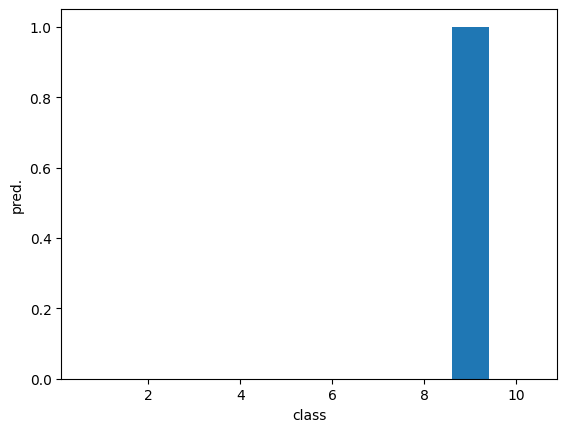

In [ ]:
plt.bar(range(1,11),pred[0])
plt.xlabel('class')
plt.ylabel('pred.')
plt.show()

슬라이싱했던 val_scaled의 클래스는 가방이며 다른 클래스들은 모두 0이 되었다.

In [ ]:
classes=['티셔츠','바지','스웨터','드레스','코트','샌달','셔츠','스니커즈','가방','앵클 부츠']

In [ ]:
import numpy as np
print(classes[np.argmax(pred)])

가방


In [ ]:
test_scaled=test_input.reshape(-1,28,28,1)/255.0

In [ ]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 3s 10ms/step - loss: 0.2312 - accuracy: 0.9164


[0.23115238547325134, 0.9164000153541565]

모델을 테스트 해보니 91%정도의 정확도를 얻을수 있었다.

In [ ]:
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.h5')
model.layers#계층에서 하는 일들을 보여준다.

In [ ]:
conv=model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


첫번째 컨불루션에서의 배열을 보여준다. 3커널에 1깊이, 32개의 필터(특성,속성)를 가지고 있는것으로 나오고 있다. 두번째 값은 절편갯수이므로 필터의 수와 같은 32가 나오게 된다.

In [ ]:
conv_weights=conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.048423674 0.27875772


넘파이를 사용하여 평균과 표준편차를 구했다.
평균은 0에 가깝고 표준편차는 0.27에 가깝다.

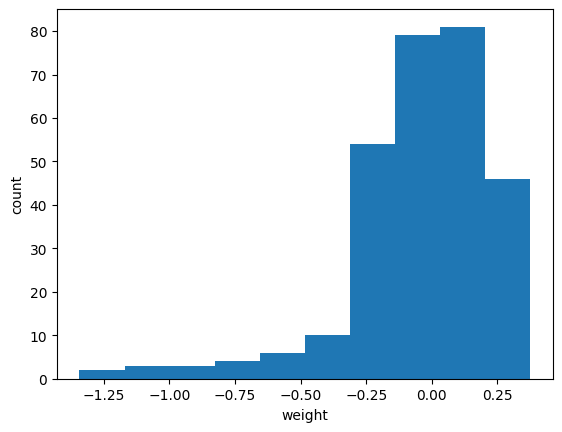

In [ ]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

히스토 그램을그려보았다. 0에 가까운 값을 가진 가중치들이 많이 있다는것을 확인 가능하다.

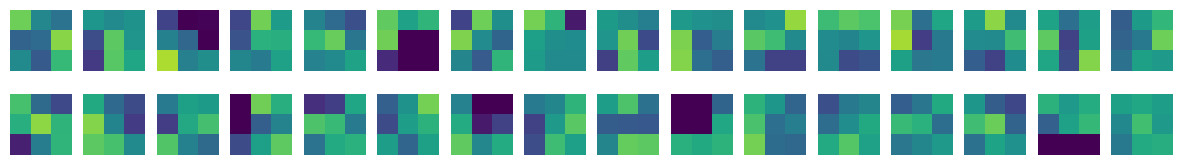

In [ ]:
fig, axs = plt.subplots(2,16,figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(conv_weights[:,:,0,i*16+j],vmin=-0.5, vmax=0.5)
    axs[i,j].axis('off')
plt.show()

i는 인덱스고 j는 가중차값들이다.
즉 16개씩 두줄의 가중치들을 그래프로 그려낸것이다.
밝은 부분이 가중치가 높은 부분이라 보면된다.
예를 들어 첫번째 가중치는 왼쪽위와 우측에 선같은것이 나왔을때 활성화가 되는식이다.세번째 가중치의 경우면 왼쪽 아래에 선이 나타나면 활성화가 크게 될것이다.imshow는 최대값과 최솟값을 이용하여 픽셀의 강도를 표현할수 있는 함수다.

그렇다면 훈련을 안했을때와 비교해보자

In [ ]:
no_train_model=keras.Sequential()
no_train_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

In [ ]:
no_train_conv=no_train_model.layers[0]
print(no_train_conv.weights[0].shape)

(3, 3, 1, 32)


In [ ]:
no_train_conv_weights=no_train_conv.weights[0].numpy()
print(no_train_conv_weights.mean(), no_train_conv_weights.std())

-0.00566424 0.08176334


이전값과 비교해서 평균값이 매우 작아졌는것을 확인할수 있다. 표준편차도 매우 커졌다.

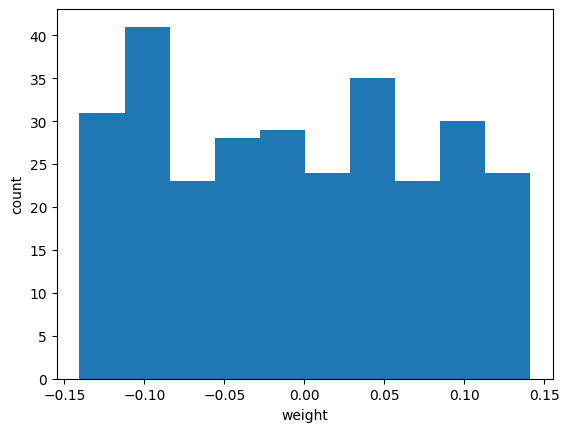

In [ ]:
import matplotlib.pyplot as plt
plt.hist(no_train_conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

가중치가 0.10dp

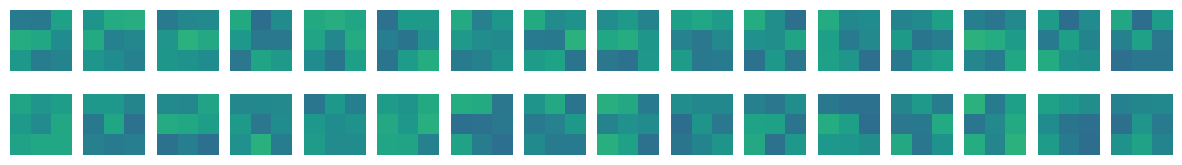

In [ ]:
fig, axs = plt.subplots(2,16,figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(no_train_conv_weights[:,:,0,i*16+j],vmin=-0.5, vmax=0.5)
    axs[i,j].axis('off')
plt.show()

밝기가 상당히 떨어진것을 확인할수 있다.
합성곱의 중요성이 눈에 보인다. 이는 유용한 패턴을 학습하지 못하여 이렇게 나오게 된 것이다.

In [ ]:
print(model.input) #모델객체의 입력을 얻을수 있다.

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [33]:
conv_acti=keras.Model(model.input, model.layers[0].output)

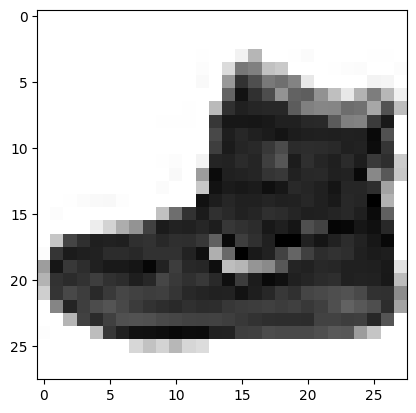

In [34]:
(train_input, train_target),(test_input, test_target)=keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [35]:
inputs = train_input[0:1].reshape(-1,28,28,1)/255.0 # -1은 모든샘플을 가져오도록 한것이다. 28 픽셀, 28픽셀, 1채널(흑백orRGB)로 보면되는것이다.
feature_maps=conv_acti.predict(inputs) #위의 1차원배열을 comv_acti-> keras.Model (model.input, model.layers[0].output)를 실행시킨후 예측을 진행한다. model.layers를 보면 깊이 0에서 conv를 진행하게되는것이다.
#즉 이 코드는 훈련데이터를 입력받고 신경망0번인 conv를 진행시킨후 출력한뒤 예측을 진행한것이 된다.

1/1 [==============================] - 0s 78ms/step


In [36]:
print(feature_maps.shape)#위의 예측까지 진행한후의 배열형식을 보게되면 차원을 유지하고있는걸 확인가능하다.

(1, 28, 28, 32)


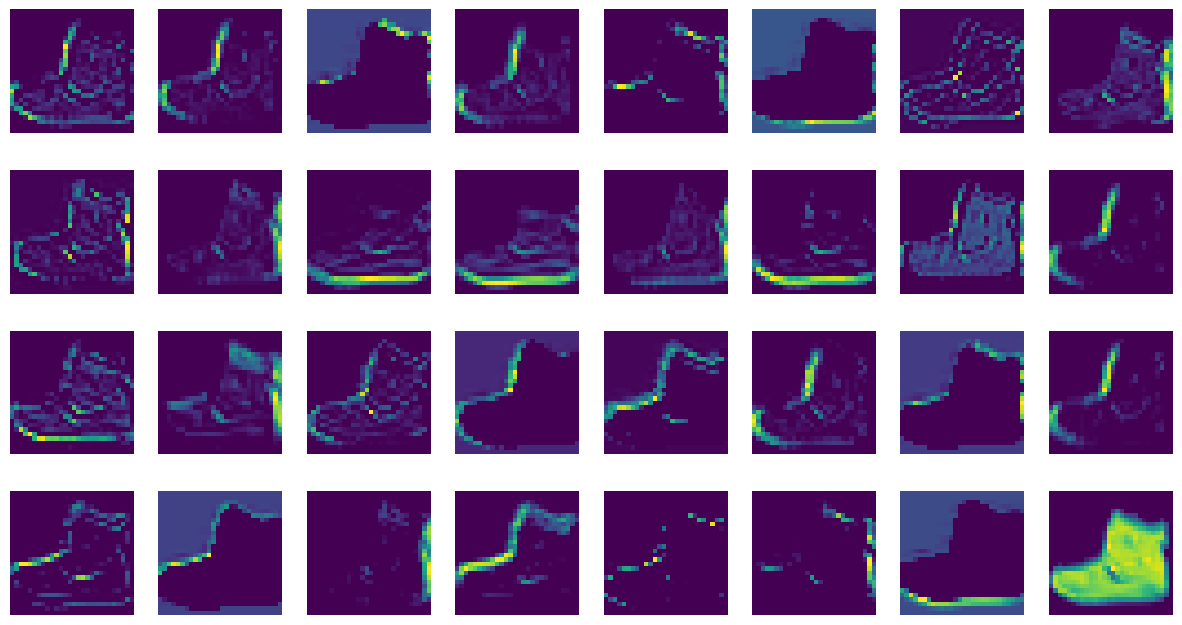

In [37]:
fig, axs =plt.subplots(4,8,figsize=(15,8))
for i in range(4):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
    axs[i,j].axis('off')
plt.show()

합성곱층을 이용해서 가중치를 시각화 하였다. 보면 맨끝에 있는 가중치의 경우에는 신발의 특성을 잘 찾아낸것으로 보인다.
전체적으로 합성곱은 음수로 구성되어있다면 그 부분을 어둡게 표현한다. 지금 보면 많은 영역이 음수로 표시되었고 마지막 가중치만 양수로 영역을 표시한것으로 보인다.

그렇다면 합성곱을 한번더 하면 어떻까?
다음층을 만들어 보자.이번에도 함수로 간략하게 표현가능하다.

In [41]:
conv2_acti=keras.Model(model.input, model.layers[2].output)

In [42]:
inputs=train_input[0:1].reshape(-1,28,28,1)/255.0 #-1은 모든샘플을 가져오도록 한것이다. 28 픽셀, 28픽셀, 1채널(흑백orRGB)로 보면되는것이다.
feature_mpas=conv2_acti.predict(inputs)

1/1 [==============================] - 0s 49ms/step


In [44]:
print(feature_mpas.shape) #이 결과는 배치크기는 1개의 샘플, 14픽셀 14픽셀 64픽셀로 conv2_acti 즉 깊이 2에서 지정해놓았다는것이된다. 위의 inputs에서 슬라이싱을 했다는것을 잊지말자

(1, 14, 14, 64)


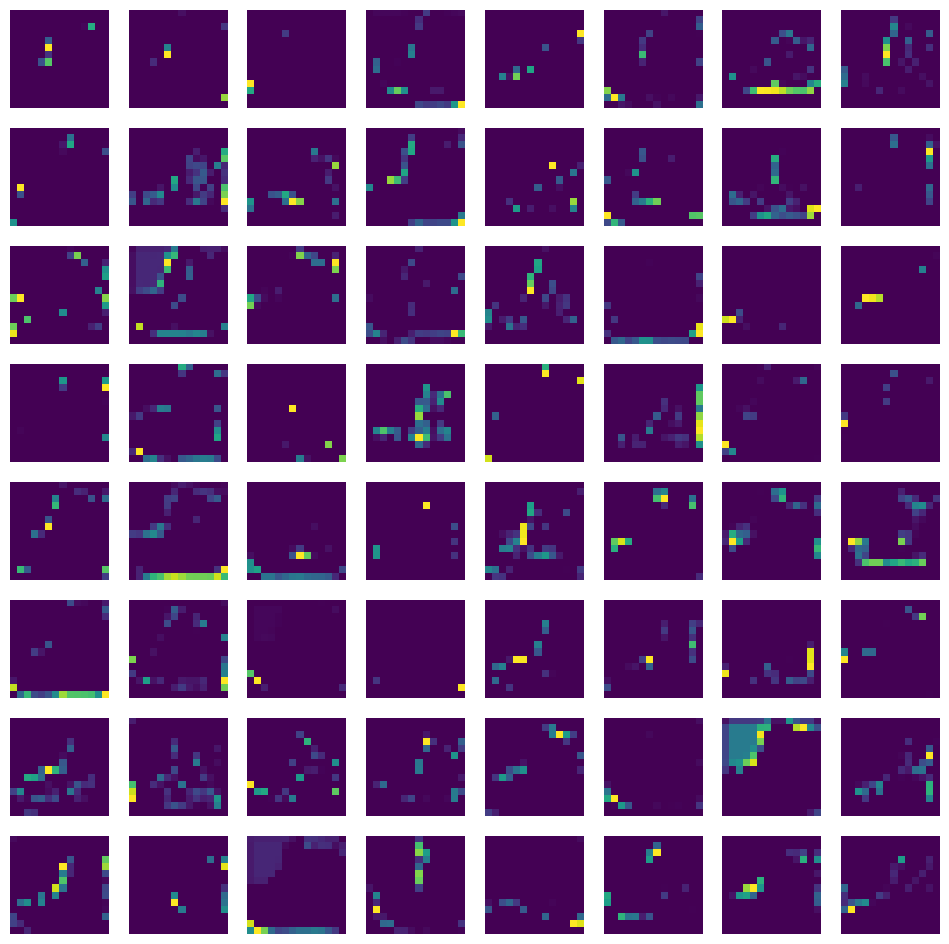

In [45]:
fig, axs =plt.subplots(8,8,figsize=(12,12))
for i in range(8):
  for j in range(8):
    axs[i,j].imshow(feature_mpas[0,:,:,i*8+j])
    axs[i,j].axis('off')
plt.show()

합성곱 한번했을때 보다 시각적으로 이해하기 힘든 이미지가 출력되었다.
이는 첫번째 합성곱에서 각 가중치를 다시 64개의 필터를 사용하여 재학습하는과정에서 단순히 이미지를 학습하는것이 아닌 가중치에 있는 특성들을 추상화 하여 학습하기 때문이다. 예를 들어 신발이 있다면 앞굽과 뒷굽을 단순하게 이미지로만 분석하지 않고 신발의 뾰족 튀어나와 부각된곳을 앞굽의 특성을 주고 그 반대를 뒷굽으로 주어 그 부위의 특징을 추상화를 한것으로 보면될 것 같다.